# 梯度下降

## 前提导入

假设你站在山坡的某个位置，当前位置记作 θ ，你需要用
最快的速度到达山底，而且每次只能以固定的步长α 走。问如何走才能满足上述条件？

这个问题的答案很简单了，当然时从最陡峭的地方下山了。这里就是梯度下降的大概意思

## 基本概念

梯度下降法（gradient descent），又名最速下降法（steepest descent）是求解无约束最优化问题最常用的方法，它是一种迭代方法，每一步主要的操作是求解目标函数的梯度向量，将当前位置的负梯度方向作为搜索方向（因为在该方向上目标函数下降最快，这也是最速下降法名称的由来）。

梯度下降法特点：越接近目标值，步长越小，下降速度越慢

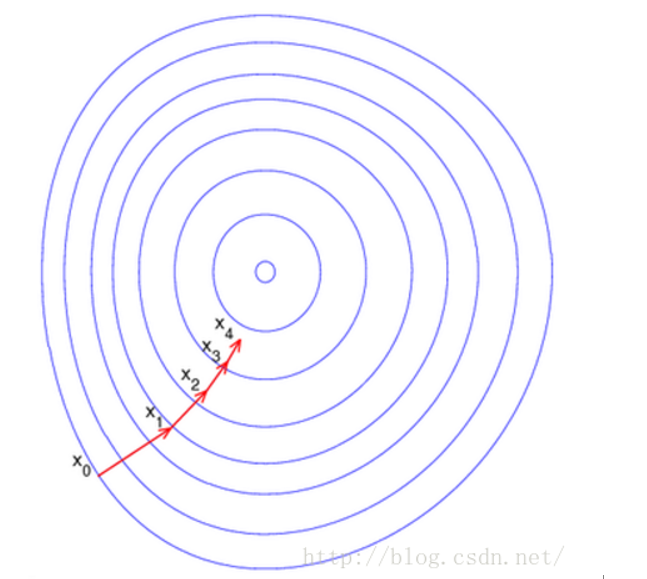

梯度下降可以用来解决机器学习算法的优化问题。

梯度下降不一定能够找到全局最优解，但有可能是一个局部最优解。如果损失函数是凸函数，梯度下降法得到的一定是全局最优解

## 梯度下降的相关概念 

1.步长或学习效率(learning rare)：步长决定在梯度下降过程中，每一步沿梯度负方向前进的距离。

2.假设函数(hppothesis function)：也就是我们的模型学习到的函数 记为 h_θ(x) = θ_0x_0+θ_1+x_1+θ_2x_2+...=θTX

3.损失函数(loss function): 损失函数是用来评估模型h_θ(x)的好坏，通常用损失函数来度量拟合的程度，线性回归中损失函数通常为label和假设函数输出的差的平方。自己理解为（实际值-真实值）的平方。

## 损失函数 

例如：样本（xi,yi）(i=1,2,3...n),采用线性回归，损失函数为
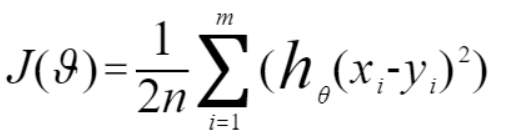

1.先决条件：确认优化模型的假设函数h_θ(x)和损失函数J_(θ)

2.参数的初始化: 初始化假设函数的参数θ(注：θ是一个向量），算法中止距离ϵ以及步长α

3.算法过程：
    
    （1）确定当前位置的损失函数的梯度，对于θ_j,梯度如下
    

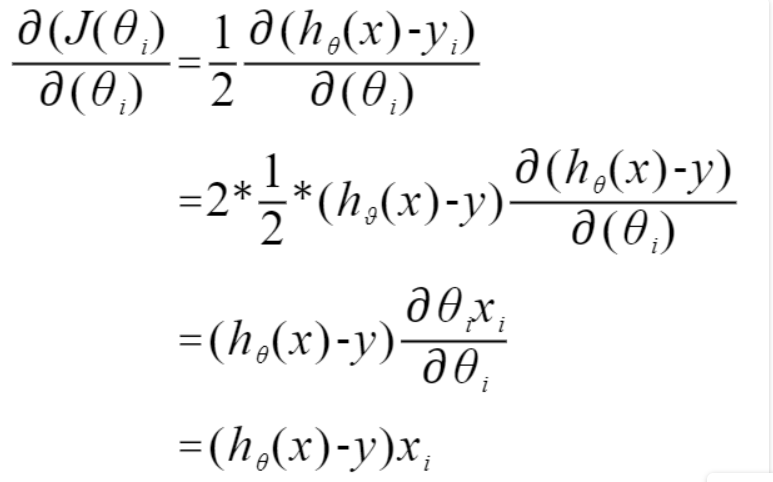

    （2）确定是否所有的θ_j,梯度下降的距离都小于ϵ，如果小于则算法中止，当前为最后结果，否则，则重复步骤（3）
    
    （3）更新所有的θ，对于θ_j（其更新的表达式如下

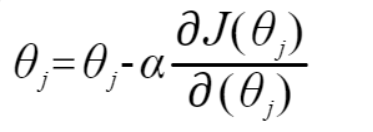

## 梯度下降算法的更新方式

### 1.批量梯度下降法BGD

批量梯度下降法是梯度下降最原始的形式，具体思路实在更新每一参数时都使用所有的样本进行更新

推导公式类似上面

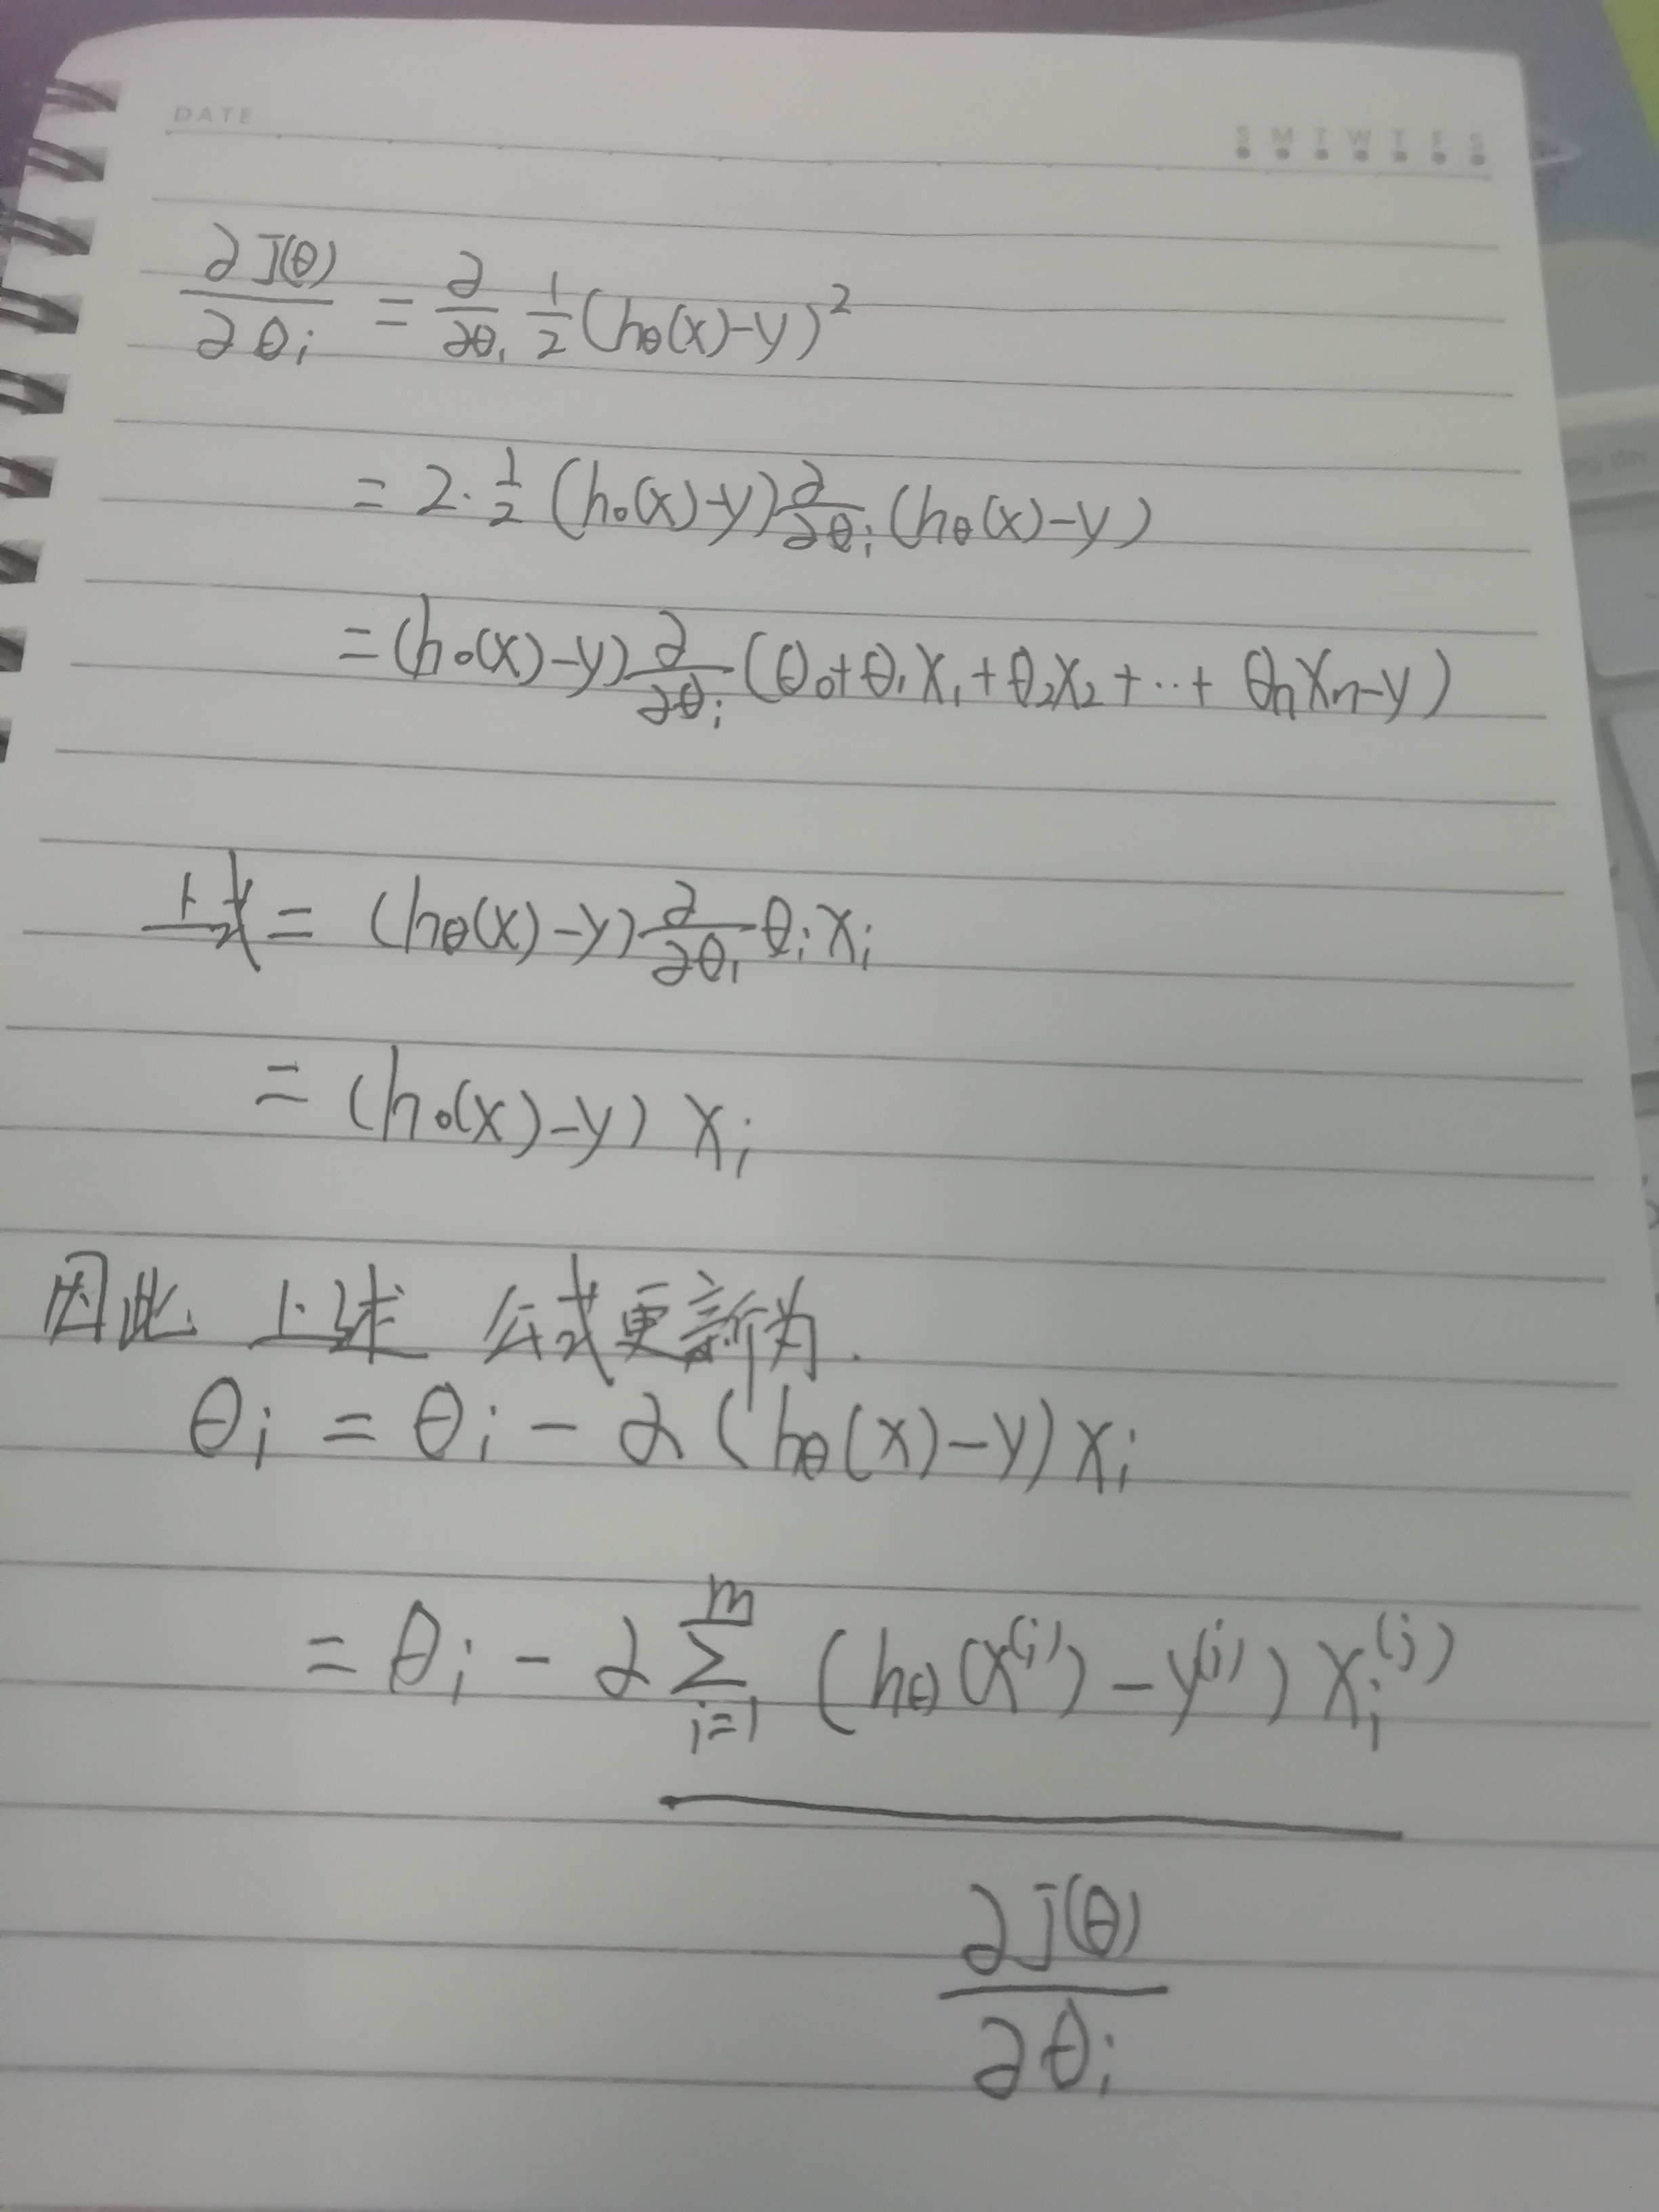

优点：全局最优解；易于并行实现

缺点：当样本数目很多事，训练的过程会很慢
从迭代次数上看,BGD迭代次数相对较少

### 2.随机梯度下降法SGD

SGD为了解决批量下降法训练过程慢这一弊端而提出的

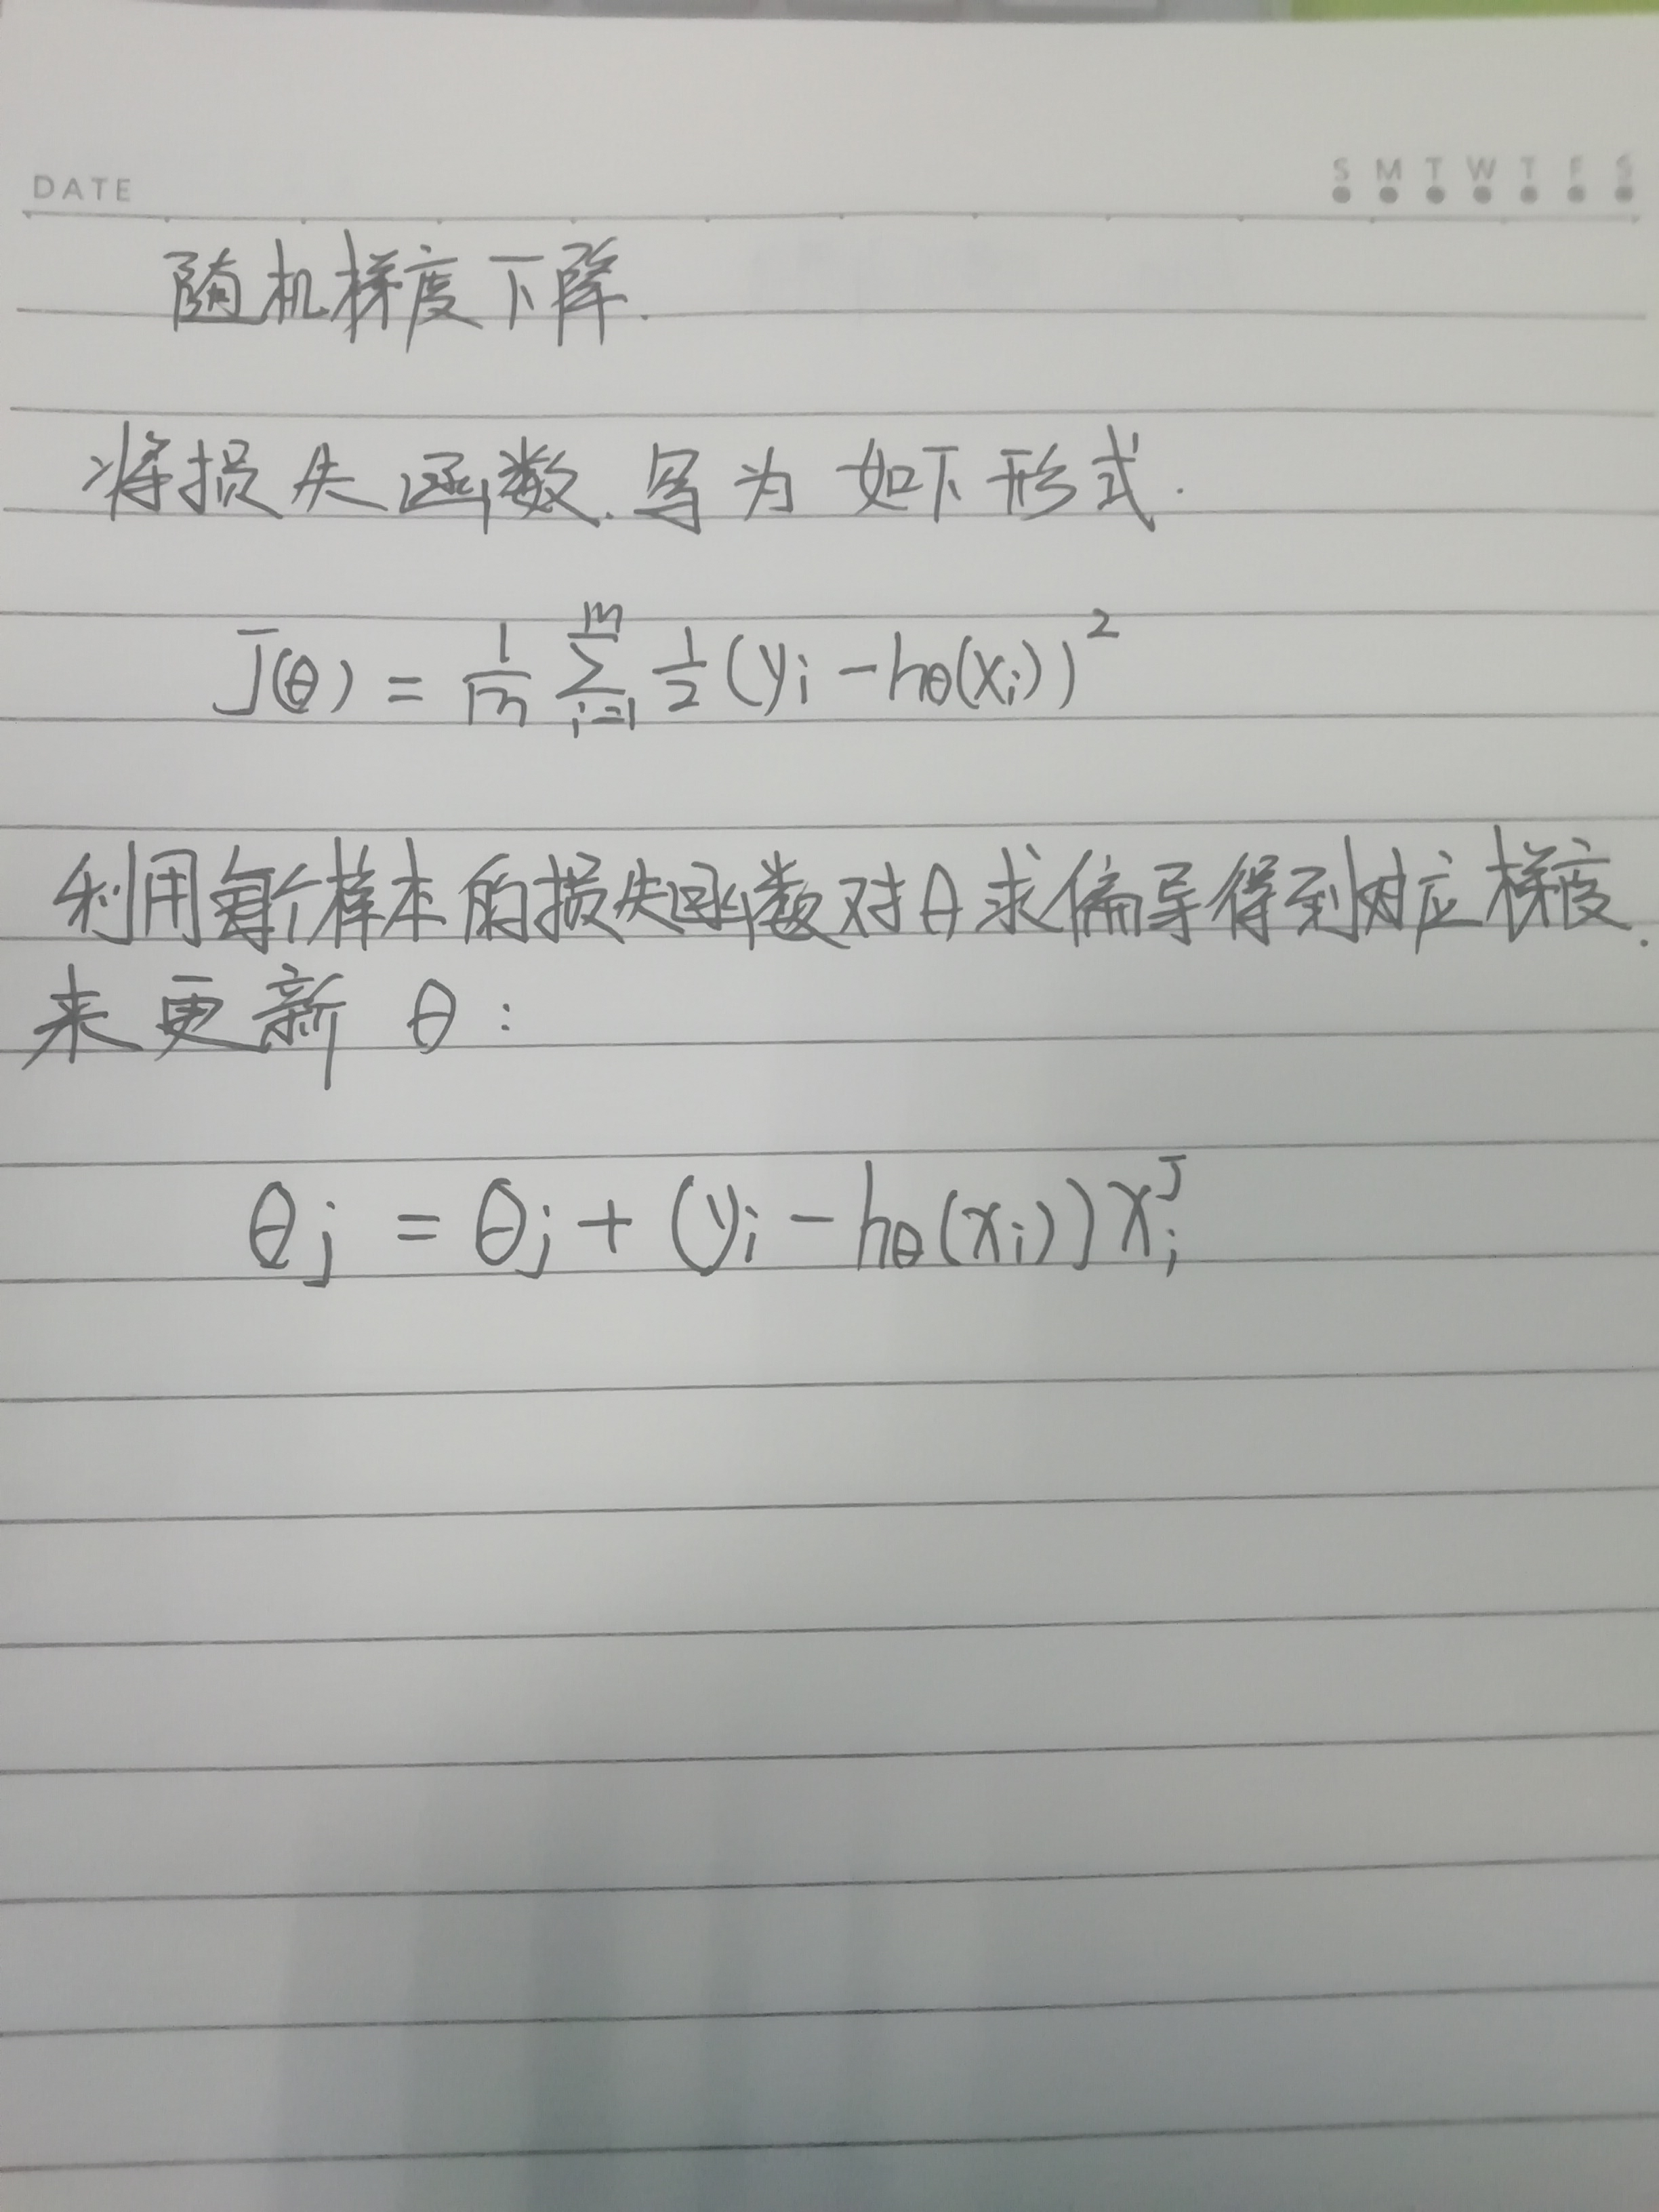

优点：训练速度快

缺点：准确度下降，并不是全局最优，不易于并行实现。并且SGD伴随之一个问题是噪音较多，使SGD并不是每次
都向着整体最优的方向前进。

SGD方法的一个缺点是，其更新方向完全依赖当前的batch，因而其更新十分不稳定。
解决方法简单做法引入momentum（？？）

### 3.小批量梯度下降法MBGD

小批量梯度下降法是在上述的两种方法的性能之间取得一个折中，即训练比较快，而且也保证最终的参数准确率。

MBGD在每次更新参数时使用b个样本（b一般为10）

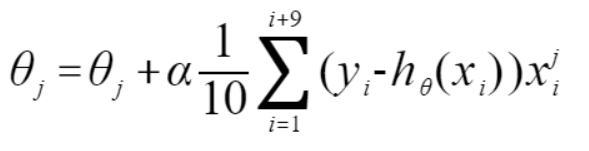

## 简单案例代码

### 我是一 

In [23]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [24]:
#构造训练数据 h（x）
x = np.arange(0.,10.,0.2)
m = len(x)
x0=np.full(m,1.0)
train_data = np.vstack([x0,x]).T  #通过矩阵变化得到测试集【x0，x1】
y = 4*x+1+np.random.randn(m)#构造“标准”答案

In [39]:
def BGD(alpha,loops,epsilon):
    '''
    alpha:步长
    loops:循环次数
    epsilon:收敛精度
    '''
    count=0#loop次数
    thata = np.random.randn(2)#随机thata向量初始的值也就是起点位置
    err = np.zeros(2)#上次thata的值，初始化为0的向量
    finish=0#完成标志位
    
    while count<loops:
        count+=1
        #所有训练数据的期望更新一次thata
        sum = np.zeros(2)#初始化thata更次年总和
        for i in range(m):
            cost = (np.dot(thata,train_data[i])-y[i])*train_data[i]
            sum+=cost
        thata = thata-alpha*sum
        if np.linalg.norm(thata-err)<epsilon:#判断是否收敛
            finish = 1
            break
        else:
            err=thata#没有则将当前thata向量赋值给err，作为下次判断参数
    print (f'SGD结果:\tloop——counts： [%d]\tthata[%f,%f]'%(count,thata[0],thata[1]))
    return thata

SGD结果:	loop——counts： [723]	thata[1.060736,3.988718]
Stata结果:	intercept(截距)：[1.0763264913065278]	slope(斜率)：[3.9863374777803062]


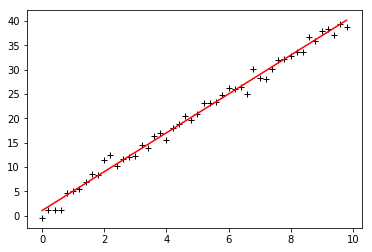

In [40]:
if __name__=='__main__':
    thata=BGD(0.0005,10000,1e-4)
    slope,intercept,r_value,p_value,slope_std_error=stats.linregress(x,y)
    print(f'Stata结果:\tintercept(截距)：[%s]\tslope(斜率)：[%s]'%(intercept,slope))
    plt.plot(x,y,'k+')
    plt.plot(x,thata[1]*x+thata[0],'r')
    plt.show()

### 我是二 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

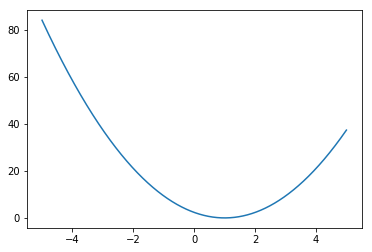

In [4]:
x = np.arange(-5,5,0.001)
y=(((x-1)*(x-1)+(x*2-2)*(x*2-2)+(x*3-3)*(x*3-3))*1/6.0)
plt.plot(x,y)
plt.show()

In [7]:
def sum(x):
    return ((x*1-1)+(x*2-2)*2+(x*3-3)*3)
def fun(x):
    return ((1/3.0)*sum(x))
old=0
new=5
step=0.01
pre = 0.00000001
def src_fun(x):
    print(((x-1)*(x-1)+(x*2-2)*(x*2-2)+(x*3-3)*(x*3-3))*1/6.0)
    

In [8]:
while abs(new-old)>pre:
    old = new
    new = new-step*fun(old)
print(new)
print(src_fun(new))

1.0000001977980435
9.128948731816311e-14
None
